<a href="https://colab.research.google.com/github/SamG1002/SpotifyML/blob/main/7dayscode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎵 ML Previsão popularidade de uma musica

**Sobre o dataset que possui as seguintes colunas:**


---


* ~**track_id** : o ID do Spotify para a faixa~ - **Removi**
* ~**artistas** : os nomes dos artistas que executaram a faixa. Se houver mais de um artista, eles serão separados por uma;~ - **Removi**
* ~**album_name** : O nome do álbum em que a faixa aparece~ -**Removi**
* ~**track_name** : Nome da faixa~ - **Removi**
* **popularidade** : A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular . A popularidade é calculada por algoritmo e baseia-se, em grande parte, no número total de reproduções que a faixa teve e no quão recentes são essas reproduções. De modo geral, as músicas que são tocadas muito agora terão uma popularidade maior do que as músicas que eram tocadas muito no passado. Faixas duplicadas (por exemplo, a mesma faixa de um single e de um álbum) são avaliadas de forma independente. A popularidade do artista e do álbum é derivada matematicamente da popularidade da faixa.
* **duração_ms** : a duração da trilha em milissegundos
* **explícito** : se a faixa tem letras explícitas ou não (verdadeiro = sim, tem; falso = não, não tem OU desconhecido)
* **dançabilidade** : a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançante e 1,0 é mais dançante
* **energia** : Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem pontuação baixa na escala.
* **key** : A tonalidade em que a faixa está. Os números inteiros são mapeados para afinações usando a notação padrão de classe de afinação. Por exemplo 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1
* **Loudness** : O volume geral de uma faixa em decibéis (dB)
* **mode** : Mode indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual deriva seu conteúdo melódico. Maior é representado por 1 e menor é 0
* **Speechiness** : Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não faladas
* **acústica** : uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica. 1,0 representa alta confiança de que a faixa é acústica
* **instrumentalidade** : prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal
* **vivacidade** : detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 oferece forte probabilidade de que a trilha esteja ativa
* **valência** : Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada)
* **tempo** : O andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, andamento é a velocidade ou andamento de uma determinada peça e deriva diretamente da duração média da batida.
* **time_signature** : uma assinatura de compasso estimada. A fórmula de compasso (metro) é uma convenção de notação para especificar quantas batidas há em cada compasso (ou compasso). A fórmula de compasso varia de 3 a 7, indicando fórmulas de compasso de 3/4, a 7/4.
* **track_genre** : o gênero ao qual a faixa pertence

### **⬇️ Importações de bibliotecas usadas**

In [493]:
import pandas as pd
import numpy as np
#graficos
import seaborn as sns
import matplotlib.pyplot as plt
#tratamento dos dados
from sklearn.preprocessing import MinMaxScaler
#divisão dos dados
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#avaliacao do modelo
from sklearn import metrics
from yellowbrick.model_selection import FeatureImportances

**Leitura do dataset**

In [494]:
df = pd.read_csv('https://raw.githubusercontent.com/SamG1002/SpotifyML/main/spotify.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### **🧹 Limpeza e filtragem**

**Removo as colunas no qual nao desejo por achar irrelevante para o objetivo que busco, e como li na documentação da origem do dataset, a coluna 'speechiness' quando maior que 0.66 significa que a track seria algo apenas falado(como talkshow e podcast), não é relevante no momento então filtro removendo essas tracks**

In [495]:
df = df.drop(['Unnamed: 0', 'track_id', 'track_name', 'album_name', 'artists'], axis=1)
df = df.query('speechiness <= 0.67')
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Verifico a quantidade de linhas vazias e nulas**

In [496]:
# Cria DataFrames para cada contagem
null_df = pd.DataFrame({'Contagem Nulos': df.isnull().sum()})
na_df = pd.DataFrame({'Contagem Nan': df.isna().sum()})
result_df = pd.concat([null_df, na_df], axis=1)
result_df

,Contagem Nulos,Contagem Nan
popularity,0,0
duration_ms,0,0
explicit,0,0
danceability,0,0
energy,0,0
key,0,0
loudness,0,0
mode,0,0
speechiness,0,0
acousticness,0,0


**Faço a limpeza no dataset**

In [497]:
df.dropna(inplace=True)

### **📚 Estudando os dados**

In [498]:
print(f'Em meu dataset tenho {df.shape[0]} linhas e {df.shape[1]} colunas.')

Em meu dataset tenho 113124 linhas e 16 colunas.


**Verifico informações como tipos de dados das colunas, quantidade de linhas e seus nomes**

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113124 non-null  int64  
 1   duration_ms       113124 non-null  int64  
 2   explicit          113124 non-null  bool   
 3   danceability      113124 non-null  float64
 4   energy            113124 non-null  float64
 5   key               113124 non-null  int64  
 6   loudness          113124 non-null  float64
 7   mode              113124 non-null  int64  
 8   speechiness       113124 non-null  float64
 9   acousticness      113124 non-null  float64
 10  instrumentalness  113124 non-null  float64
 11  liveness          113124 non-null  float64
 12  valence           113124 non-null  float64
 13  tempo             113124 non-null  float64
 14  time_signature    113124 non-null  int64  
 15  track_genre       113124 non-null  object 
dtypes: bool(1), float64(

In [500]:
df.describe().round(2)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00,113124.00
mean,33.31,228055.95,0.57,0.64,5.31,-8.24,0.64,0.08,0.31,0.16,0.21,0.47,122.32,3.91
std,22.37,106967.39,0.17,0.25,3.56,5.02,0.48,0.08,0.33,0.31,0.18,0.26,29.91,0.43
min,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,174346.00,0.46,0.47,2.00,-9.97,0.00,0.04,0.02,0.00,0.10,0.26,99.73,4.00
50%,35.00,213000.00,0.58,0.68,5.00,-6.98,1.00,0.05,0.16,0.00,0.13,0.46,122.05,4.00
75%,50.00,261400.00,0.70,0.85,8.00,-4.99,1.00,0.08,0.59,0.05,0.27,0.68,140.10,4.00
max,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.67,1.00,1.00,1.00,1.00,243.37,5.00


### **📊 Análise Exploratória dos Dados**

In [501]:
print(f"Temos um total de {df['track_genre'].unique().shape[0]} generos musicais")

Temos um total de 114 generos musicais


**Como temos muitos, vou trabalhar com os 15 generos mais populares, entao agrupo generos pela popularidade e tiro suas medias, depois ordeno do maior para menor e pego apenas os 15 primeiros**

In [502]:
top15_genero_populares = df.groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False).head(15)
top15_genero_populares

,track_genre,popularity
81,pop-film,59.283000
65,k-pop,56.886774
15,chill,53.677031
94,sad,52.368104
44,grunge,49.594000
55,indian,49.539000
5,anime,48.772000
33,emo,48.103310
97,sertanejo,47.866000
80,pop,47.576000


**E agora podemos visualizar os generos mais popoulares graficamente**

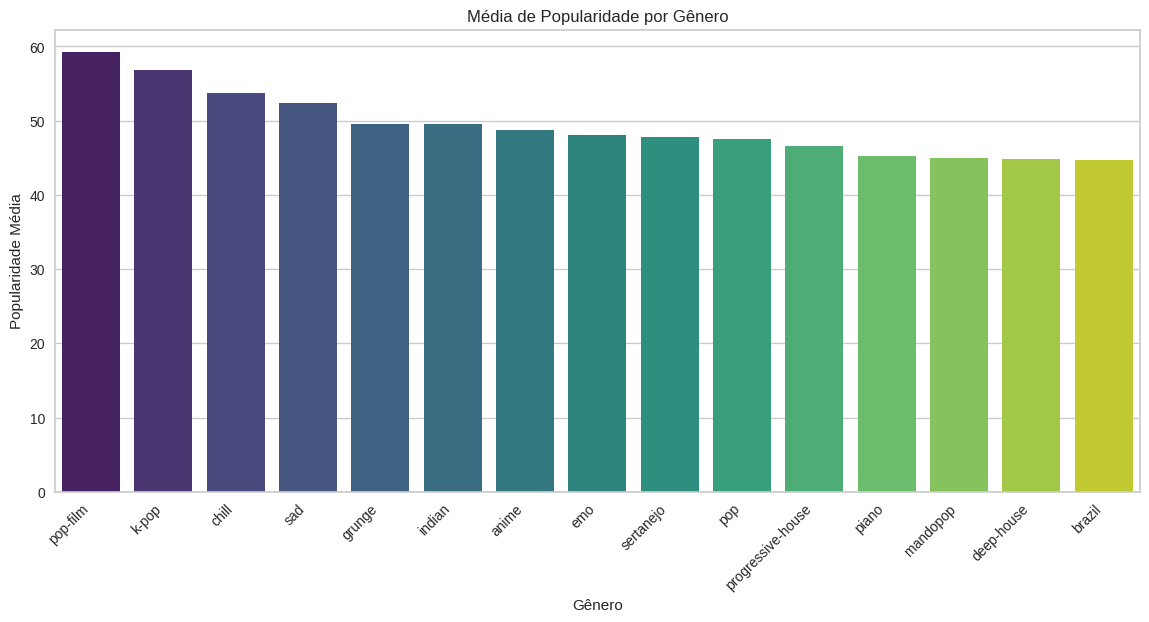

In [503]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top15_genero_populares['track_genre'], y=top15_genero_populares['popularity'], palette='viridis')
plt.title('Média de Popularidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Popularidade Média')
plt.xticks(rotation=45, ha='right')
plt.show()

**Gostaria de ver a popularidade das musicas dependendo de sua duração, então categorizei e criei uma nova coluna, usei a coluna 'duration_ms' que possui valores em milissegundos**

In [504]:
intervalos_duracao = pd.cut(df['duration_ms'], bins=[0, 180000, 240000, 300000, float('inf')],
                            labels=['Curta', 'Média', 'Longa', 'Muito Longa'])
df['Duracao_intervalo'] = intervalos_duracao
df['Duracao_intervalo']

0               Média
1               Curta
2               Média
3               Média
4               Média
             ...     
113995    Muito Longa
113996    Muito Longa
113997          Longa
113998          Longa
113999          Longa
Name: Duracao_intervalo, Length: 113124, dtype: category
Categories (4, object): ['Curta' < 'Média' < 'Longa' < 'Muito Longa']

**Depois fiz um agrupamento entre a popularidade dependendo de sua duração, e tirei sua média, após fiz um plot de barras**

In [505]:
media_popularidade_por_duracao = df.groupby('Duracao_intervalo')['popularity'].mean().reset_index()
media_popularidade_por_duracao

,Duracao_intervalo,popularity
0,Curta,31.489342
1,Média,34.719575
2,Longa,34.782515
3,Muito Longa,31.186131


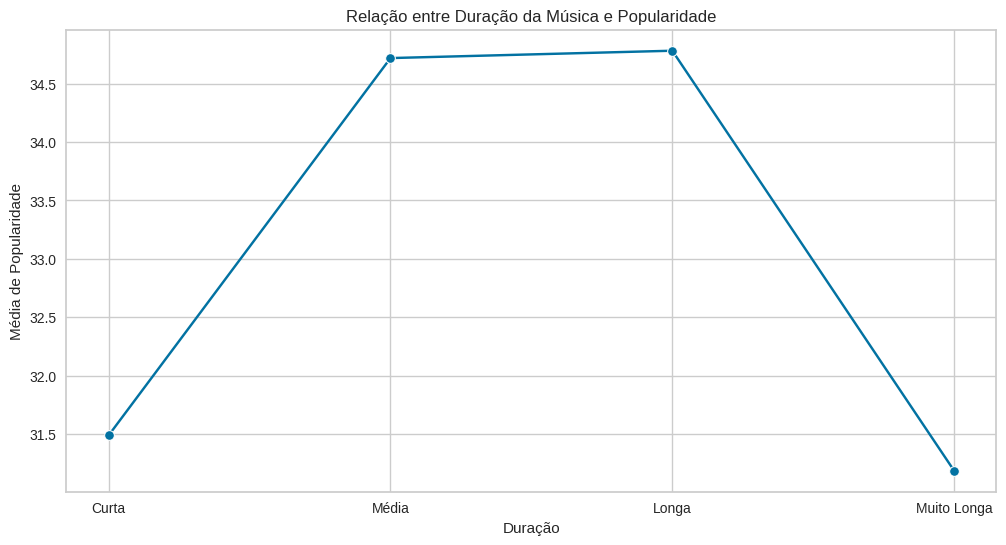

In [506]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Duracao_intervalo', y='popularity', data=media_popularidade_por_duracao, marker='o')
plt.title('Relação entre Duração da Música e Popularidade')
plt.xlabel('Duração')
plt.ylabel('Média de Popularidade')
plt.show()

**Farei o mesmo tratamento para 'tempo'(valores em BPM) para definir o andamento musical**

In [507]:
intervalos = [0, 75, 107, 120, 168, float('inf')]
legenda = ['Larghetto ( < 75)', 'Andante (75 - 107)', 'Moderato (108 - 120)', 'Allegro (120 - 168)', 'Alegricissimo( 168 > )']
intervalo_andamento = pd.cut(df['tempo'], bins=intervalos, labels=legenda)
df['Andamento'] = intervalo_andamento

In [508]:
media_popularidade_por_andamento = df.groupby('Andamento')['popularity'].mean().reset_index()
media_popularidade_por_andamento

,Andamento,popularity
0,Larghetto ( < 75),31.116184
1,Andante (75 - 107),33.161627
2,Moderato (108 - 120),33.753179
3,Allegro (120 - 168),33.599406
4,Alegricissimo( 168 > ),32.478363


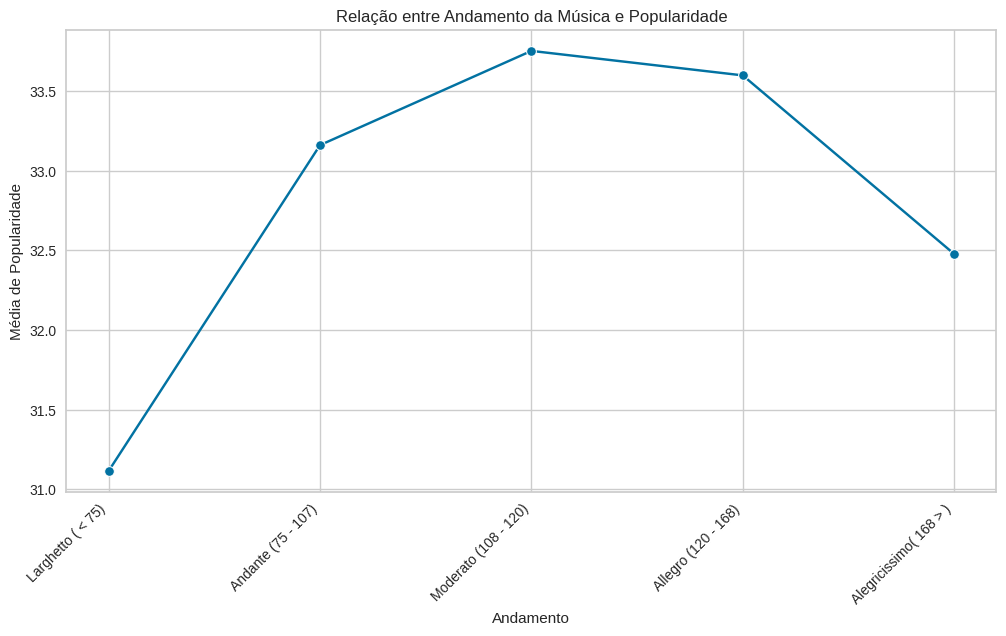

In [509]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Andamento', y='popularity', data=media_popularidade_por_andamento, marker='o')
plt.title('Relação entre Andamento da Música e Popularidade')
plt.xlabel('Andamento')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=45, ha='right')
plt.show()

**Agrupamento da média de popularidade de musicas explicitas ou não.**

In [510]:
popularidade_explicito = df.groupby('explicit')['popularity'].mean().reset_index()
popularidade_explicito

,explicit,popularity
0,False,32.967338
1,True,37.201086


**Notamos que músicas explicítas tem popularidade maior**

Text(0.5, 1.0, 'Popularidade das musicas explicitas')

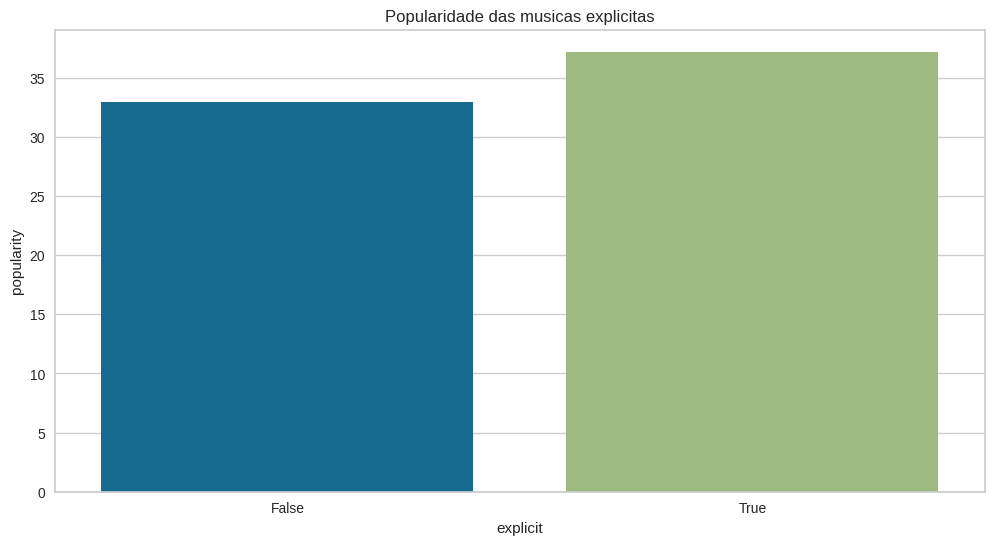

In [511]:
plt.figure(figsize=(12, 6))
sns.barplot(x='explicit', y='popularity', data=popularidade_explicito)
plt.title('Popularidade das musicas explicitas')

**Gostaria de analisar as demais colunas, como 'key'(tonalidade), 'mode'(altura acorde) e time_signature(formula do compasso), preciso efetuar alguns tratamentos para traduzir para o valor correto.**


---
**Legenda:**

* key : A tonalidade em que a faixa está. Os números inteiros são mapeados para afinações usando a notação padrão de classe de afinação. Por exemplo 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1

* mode : Mode indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual deriva seu conteúdo
melódico. Maior é representado por 1 e menor é 0

* time_signature : uma assinatura de compasso estimada. A fórmula de compasso (metro) é uma convenção de notação para especificar quantas batidas há em cada compasso (ou compasso). A fórmula de compasso varia de 3 a 7, indicando fórmulas de compasso de 3/4, a 7/4.

In [512]:
df['mode'] = df['mode'].replace({0: 'Menor', 1: 'Maior'})

In [513]:
df['key'] = df['key'].replace({0: 'Do', 1: 'Do#_Ré-b', 2: 'Re', 3: 'Re#_Mi-b', 4: 'Mi', 5: 'Fa', 6: 'Fa#_Sol-b', 7: 'Sol', 8: 'Sol#_La', 9: 'La', 10: 'La#_Si-b', 11: 'Si'})

In [514]:
df['time_signature'] = df['time_signature'].replace({3: '3/4', 4: '4/4', 5: '5/4', 6: '6/4', 7: '7/4'})

**Após transformar os dados, posso separar as colunas numericas de colunas categoricas para guardar em uma lista e fazer a visualizacao gráfica dos dados.**

In [515]:
col_numerico = []
col_categorico = []
for c in df.columns:
  if df[c].dtype == np.int64 or df[c].dtype == np.float64:
    col_numerico.append(c)
  else:
    col_categorico.append(c)

**Mostramos a contagem das categoricas que se repetem no dataset e mostramos suas porcentagens em relação as demais categorias da coluna(exceto 'track_genre' pois já mostrei anteriormente e suas multiplas catégorias teria uma péssima visualização)**

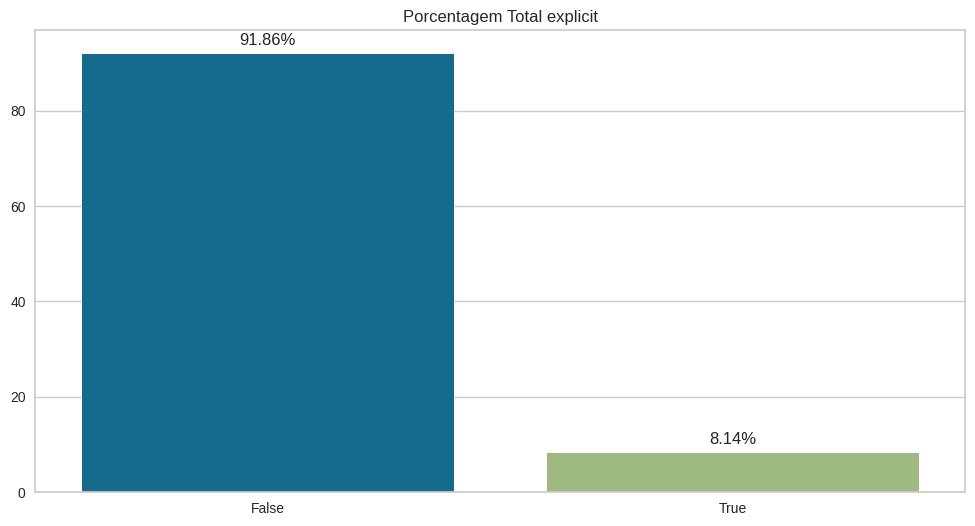

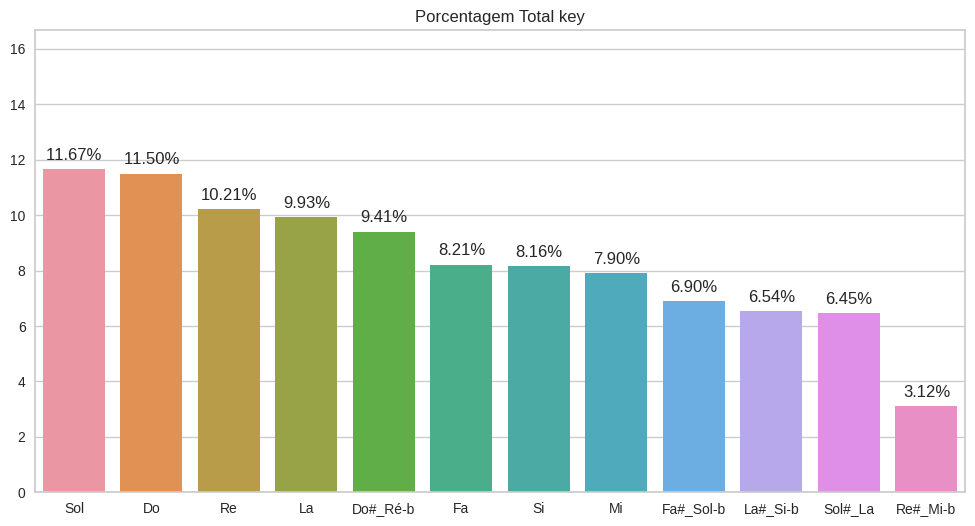

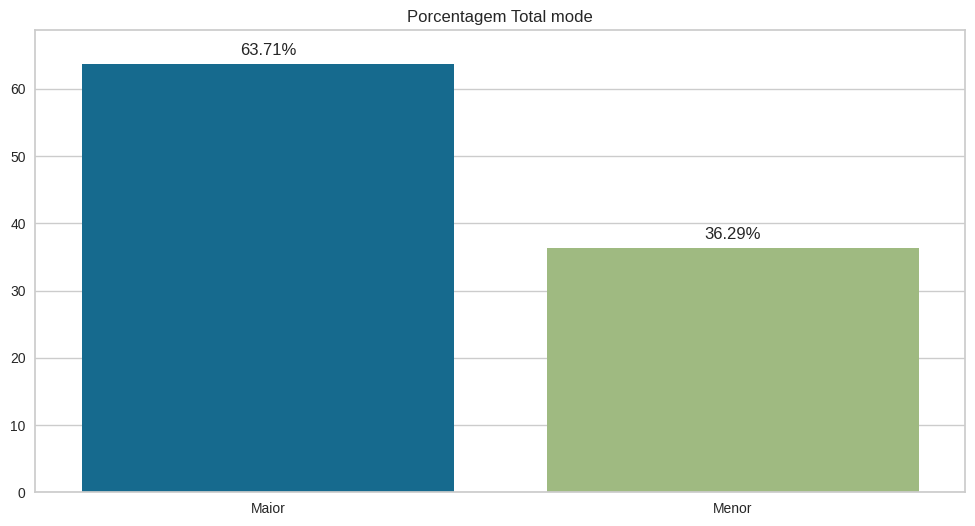

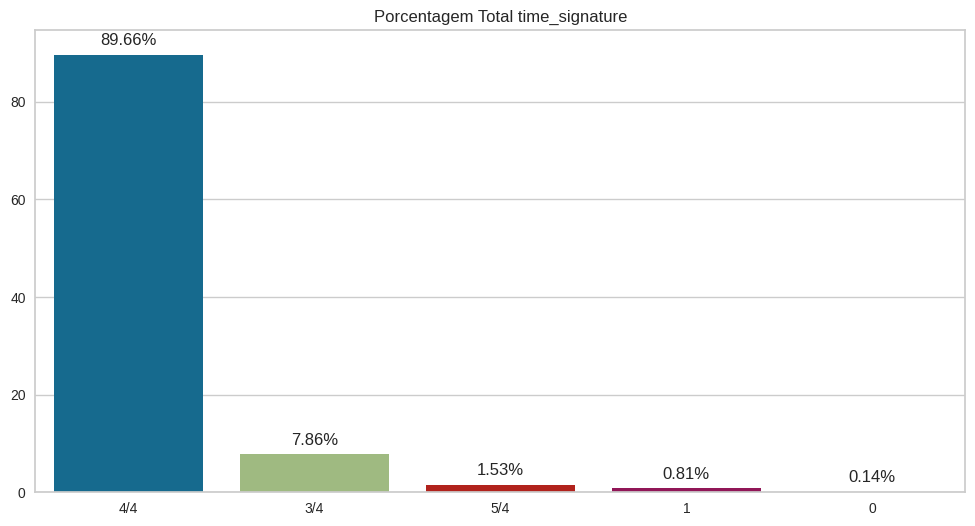

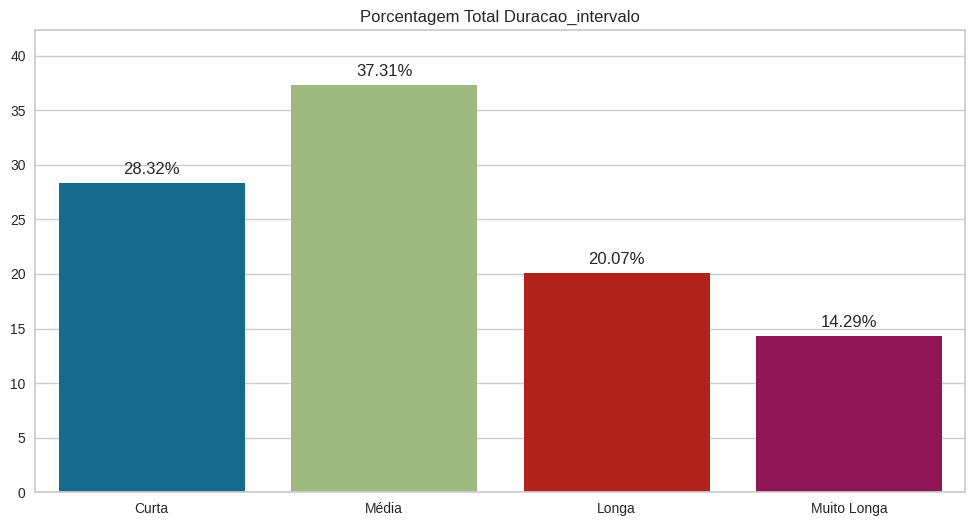

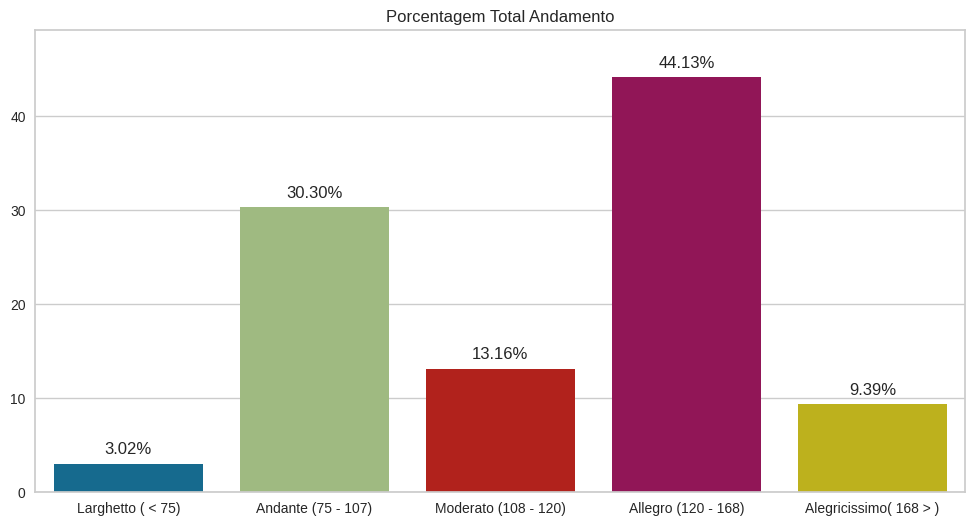

In [516]:
for column in col_categorico:
  if column != 'track_genre':
    #calculei a porcentagem de escolha em cada coluna
    porcentagem_total = df[column].value_counts(normalize=True) * 100
    #apresento o grafico
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=porcentagem_total.index, y=porcentagem_total.values)
    # Adicionar rótulos com porcentagem no topo das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    # Ajustar a margem superior do eixo y (ylim)
    ax.set_ylim(top=max(porcentagem_total.values) + 5)

    plt.title(f'Porcentagem Total {column}')
    plt.show()

***Nestes gráficos notamos dados muito relevantes como irei pontuar:***

* 91,86% das musicas não são explicitas(e como vimos anteriormente, músicas explicitas tendiam a ter mais sucesso).
* O Tom das musicas são bem distribuídas, mas Sol e Dó se destacam como as mais usadas enquanto Ré#/Mi bemol é a menos utilizada.
* A altura do acorde é predominantemente Maior, assim como o Compasso 4/4.
* O andamento das músicas se mantiveram no intervalo de 120-168 e 75-107, sendo as mais utilizadas.


---


**Mapa de calor para visualizar a correlação entre as colunas**

<ipython-input-517-43091cbe0e95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


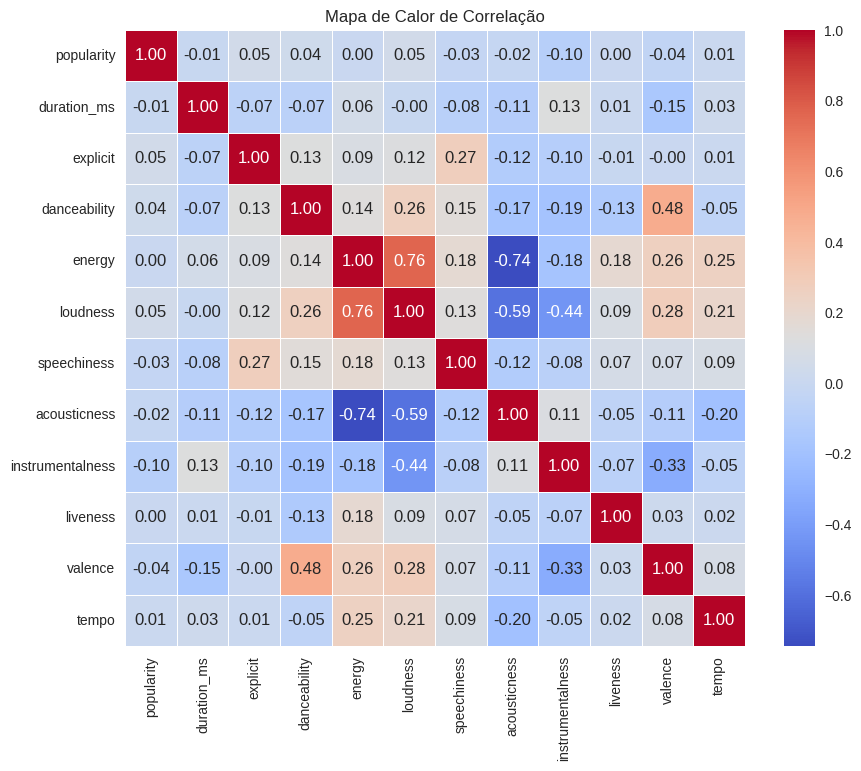

In [517]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlação')
plt.show()


* Notei nenhuma das demais colunas tinha correlação direta com o alvo 'popularity'.

* Notei que 'energy' e 'Loudness' possuem uma correlação forte, ou seja enquanto uma evolui, a outra evolui junto, isso faz com que abra espaço para retirarmos uma delas para deixar nosso dataset com menos colunas


In [518]:
df = df.drop(['energy'], axis=1)

### **🛠️ Tratamento dos Dados**

**Bom primeiro vamos retirar linhas duplicadas caso haja**

In [519]:
df = df.drop_duplicates()
df.head()

,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Duracao_intervalo,Andamento
0,73,230666,False,0.676,Do#_Ré-b,-6.746,Menor,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4/4,acoustic,Média,Andante (75 - 107)
1,55,149610,False,0.420,Do#_Ré-b,-17.235,Maior,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4/4,acoustic,Curta,Andante (75 - 107)
2,57,210826,False,0.438,Do,-9.734,Maior,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4/4,acoustic,Média,Andante (75 - 107)
3,71,201933,False,0.266,Do,-18.515,Maior,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3/4,acoustic,Média,Alegricissimo( 168 > )
4,82,198853,False,0.618,Re,-9.681,Maior,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4/4,acoustic,Média,Moderato (108 - 120)


**Temos que definir se uma música é popular ou não, portanto o campo popularity não nos serve já que traz um valor em intervalo de 0 - 100, e queremos popular ou nao, por isso definimos uma música popular com popularity acima de 75, e não popular abaixo de 75.**


- Estarei utilizando o select do numpy para fazer essa separação condicional e
criar uma nova coluna 'Classe'.


> Caso seja do interesse, segue documentação: [Doc Select() NumPy](https://numpy.org/doc/stable/reference/generated/numpy.select.html)







In [520]:
condicoes = [
    df['popularity'] >= 75,
    df['popularity'] < 75
]
categorias = ['Popular', 'Não Popular']

In [521]:
df['Classe'] = np.select(condicoes, categorias, default='Indefinido')
df[['popularity','Classe']].head()

<ipython-input-521-ad5650890bad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classe'] = np.select(condicoes, categorias, default='Indefinido')


,popularity,Classe
0,73,Não Popular
1,55,Não Popular
2,57,Não Popular
3,71,Não Popular
4,82,Popular


**Vou utilizar alguns métodos para realizar o tratamento dos dados, mas antes irei remover algumas colunas nos quais não serão interessantes para meu modelo. Pois são colunas baseadas em uma outra varíavel, sendo dispensavéis para nosso modelo, além da 'track_genre' que retirei por haver categorias demais.**

*   Duracao_intervalo (duration_ms)
*   Andamento (tempo)
*   track_genre (excesso de categorias)
*   popularity (Classe)



In [522]:
df = df.drop(['Duracao_intervalo','Andamento', 'track_genre', 'popularity'], axis=1)

**Agora posso coletar novamente as colunas que contêm varíaveis quantitativas e qualitativas.**

In [523]:
col_numerico = []
col_categorico = []
for c in df.columns:
  if df[c].dtype == np.int64 or df[c].dtype == np.float64:
    col_numerico.append(c)
  else:
    col_categorico.append(c)

**Aqui podemos visualiza-las e suas informações**

In [524]:
df[col_numerico].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106039 entries, 0 to 113999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       106039 non-null  int64  
 1   danceability      106039 non-null  float64
 2   loudness          106039 non-null  float64
 3   speechiness       106039 non-null  float64
 4   acousticness      106039 non-null  float64
 5   instrumentalness  106039 non-null  float64
 6   liveness          106039 non-null  float64
 7   valence           106039 non-null  float64
 8   tempo             106039 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 8.1 MB


In [525]:
df[col_categorico].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106039 entries, 0 to 113999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   explicit        106039 non-null  bool  
 1   key             106039 non-null  object
 2   mode            106039 non-null  object
 3   time_signature  106039 non-null  object
 4   Classe          106039 non-null  object
dtypes: bool(1), object(4)
memory usage: 4.1+ MB


**Normalização**

**Faço a normalização das colunas quantitativas utilizando MinMaxScaler da sklearn**
> Caso seja do interesse, segue documentação: [Doc MinMaxScaler() SkLearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [526]:
scaler = MinMaxScaler()
df[col_numerico] = scaler.fit_transform(df[col_numerico])
df[col_numerico].astype(int)
df.head()

,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Classe
0,0.044043,False,0.686294,Do#_Ré-b,0.791392,Menor,0.214072,0.032329,0.000001,0.3580,0.718593,0.361245,4/4,Não Popular
1,0.028566,False,0.426396,Do#_Ré-b,0.597377,Maior,0.114222,0.927711,0.000006,0.1010,0.268342,0.318397,4/4,Não Popular
2,0.040255,False,0.444670,Do,0.736123,Maior,0.083383,0.210843,0.000000,0.1170,0.120603,0.313643,4/4,Não Popular
3,0.038557,False,0.270051,Do,0.573701,Maior,0.054341,0.908635,0.000071,0.1320,0.143719,0.746758,3/4,Não Popular
4,0.037969,False,0.627411,Re,0.737103,Maior,0.078743,0.470884,0.000000,0.0829,0.167839,0.492863,4/4,Popular


**Faço as substituições na 'Classe'**

In [527]:
df['Classe'] = df['Classe'].replace({'Não Popular' : 0, 'Popular' : 1})

**Pego as colunas qualitativas que irei retirar**

In [528]:
col_onehot = ['key', 'mode', 'time_signature', 'explicit']
df[col_onehot]

,key,mode,time_signature,explicit
0,Do#_Ré-b,Menor,4/4,False
1,Do#_Ré-b,Maior,4/4,False
2,Do,Maior,4/4,False
3,Do,Maior,3/4,False
4,Re,Maior,4/4,False
...,...,...,...,...
113995,Fa,Maior,5/4,False
113996,Do,Menor,4/4,False
113997,Do,Menor,4/4,False
113998,Sol,Maior,4/4,False


**Retiro as colunas qualitativas do meu dataset**

In [529]:
df = df.drop(col_onehot, axis=1)
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Classe
0,0.044043,0.686294,0.791392,0.214072,0.032329,0.000001,0.3580,0.718593,0.361245,False
1,0.028566,0.426396,0.597377,0.114222,0.927711,0.000006,0.1010,0.268342,0.318397,False
2,0.040255,0.444670,0.736123,0.083383,0.210843,0.000000,0.1170,0.120603,0.313643,False
3,0.038557,0.270051,0.573701,0.054341,0.908635,0.000071,0.1320,0.143719,0.746758,False
4,0.037969,0.627411,0.737103,0.078743,0.470884,0.000000,0.0829,0.167839,0.492863,False


### **🔪 Divisão dos Dados**

**Primeiro separo meu 'X'(variaveis explicativas de entrada) eliminando minha coluna de 'Classe', enquanto na variavel 'y'(variavel de saida) deixo apenas meu alvo 'Classe', removendo as demais...**

In [530]:
X = df.drop(['Classe'], axis=1)
y = df['Classe']

**Divido em 70% para treinamento e 30% para validação.**

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

**Aqui guardamos a proporção em porcentagem da classe em treinamento e teste.**

In [532]:
proporcao_classe_train = y_train.value_counts(normalize=True) * 100
proporcao_classe_test = y_test.value_counts(normalize=True) * 100

**Podemos ver a diferenca na divisoão de classe entre treinamento e teste sendo baixa.**

In [533]:
proporcao = pd.DataFrame({'Treinamento': proporcao_classe_train, 'Teste': proporcao_classe_test})
proporcao

,Treinamento,Teste
False,91.924771,91.946435
True,8.075229,8.053565


**Declaro meu objeto StratifiedKFold com 3 folds, para mais detalhes sobre deixarei a documentação a seguir: [Doc StratifiedKFold Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)**

In [534]:
skf = StratifiedKFold(n_splits=3)

**Faço a separação e mostro o fold e seus dados indexados**

In [535]:
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print(f"Fold {i}:")
  print(f" - Train: index={train_index}")
  print(f" - Test : index={test_index}")

  X_train_skf, X_test_skf = X.iloc[train_index], X.iloc[test_index]
  y_train_skf, y_test_skf = y.iloc[train_index], y.iloc[test_index]


Fold 0:
 - Train: index=[ 33433  33434  33437 ... 106036 106037 106038]
 - Test : index=[    0     1     2 ... 35890 35891 35892]
Fold 1:
 - Train: index=[     0      1      2 ... 106036 106037 106038]
 - Test : index=[33433 33434 33437 ... 71591 71592 71593]
Fold 2:
 - Train: index=[    0     1     2 ... 71591 71592 71593]
 - Test : index=[ 56528  56531  56533 ... 106036 106037 106038]


**E fazendo a mesma proporção, vemos que a diferença das classes é minima.**

In [536]:
proporcao_classe_train_skf = y_train_skf.value_counts(normalize=True) * 100
proporcao_classe_test_skf = y_test_skf.value_counts(normalize=True) * 100
proporcao_skf = pd.DataFrame({'Treinamento_skf': proporcao_classe_train_skf, 'Teste_skf': proporcao_classe_test_skf})
proporcao_skf

,Treinamento_skf,Teste_skf
False,91.931309,91.931194
True,8.068691,8.068806


### **🤖 Treinamento Baseline do modelo**

**Iremos criar alguns modelos de baseline básicos para vermos os desempenhos metricos de alguns modelos e avaliar qual seria a melhor solução para os nossos dados.**

**Criei a função 'avaliar_modelo' que recebe os valores reais de teste e os previsto para efetuar todas as metrícas de validação de desempenho do modelo, além disso pede um nome e um dataframe que armazeno as metricas para comparar com outros modelos**

In [537]:
resultados = pd.DataFrame(columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'Pontuação F1'])

def avaliar_modelo(y_test, y_pred, nome_modelo, resultados_df):
  # coletamos as metricas
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)

  # mostramos elas
  print(f'Acurácia: {accuracy:.4f}')
  print(f'Precisão: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'Pontuação F1: {f1:.4f}')

  # dataframe_temp para guardar as metricas atuais
  resultados_temp = pd.DataFrame({
      'Modelo': [nome_modelo],
      'Acurácia': [accuracy],
      'Precisão': [precision],
      'Recall': [recall],
      'Pontuação F1': [f1]
  })

  # depois junto com o dataframe passado como parametro e retorno
  resultados_df = pd.concat([resultados_df, resultados_temp], ignore_index=True)
  return resultados_df

**Declaro meu modelo de Regressão Logistica e faço o treinamento com o 'fit'.**
> Caso seja do interesse, segue documentação: [Doc LogisticRegression() SkLearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [538]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Então faço a previsão para teste e avalio o modelo**

In [539]:
y_pred = model.predict(X_test)
resultados = avaliar_modelo(y_test, y_pred, 'Regressão Logistica', resultados)
resultados

Acurácia: 0.9169
Precisão: 0.3726
Recall: 0.0457
Pontuação F1: 0.0814


,Modelo,Acurácia,Precisão,Recall,Pontuação F1
0,Regressão Logistica,0.91695,0.372611,0.045667,0.081363


**Vemos as features mais importantes que o modelo considerou, utilizei FeatureImportances da biblioteca yellowbrick.**

> Caso seja do interesse, segue documentação: [Doc FeatureImportances() YellowBrick](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


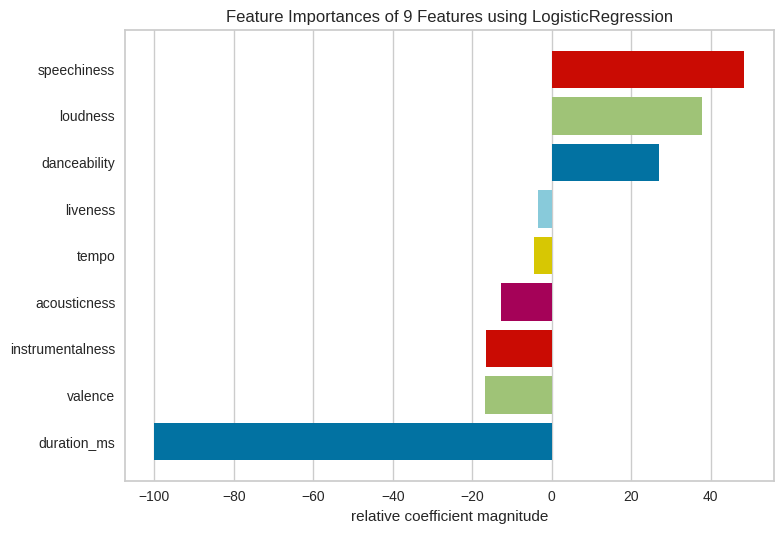

<Axes: title={'center': 'Feature Importances of 9 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [540]:
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

**Para criação de outro modelo para comparativo, escolhi o RandomForestClassifier também do sklearn.**

> Caso seja do interesse, segue documentação: [Doc RandomForestClassifier() SkLearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [541]:
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [542]:
y_pred = model_rfc.predict(X_test)
resultados = avaliar_modelo(y_test, y_pred, 'Random Florest', resultados)
resultados

Acurácia: 0.9451
Precisão: 0.8840
Recall: 0.3657
Pontuação F1: 0.5174


,Modelo,Acurácia,Precisão,Recall,Pontuação F1
0,Regressão Logistica,0.916950,0.372611,0.045667,0.081363
1,Random Florest,0.945052,0.883962,0.365730,0.517394
